In [9]:
# standard python imports
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

import tidy3d as td
from tidy3d import web
from nanopillar_sim_base import *

In [14]:
# 1 nanometer in units of microns (for conversion)
nm = 1e-3

# resonant wavelength of the T center 
res_wavelength = 1326*nm 
f0 = td.C_0/res_wavelength 
fwidth = 20e12
num_freqs = 100
run_time = 50/fwidth

# shape parameters of the pillar 
H = 220 * nm #um
W = 300 * nm #um
bulk_thickness = 10 #um

# location of the dipole
defect_z = 110 * nm #um

# location of the monitor 
top_monitor_z = 1000 * nm # the z location of the top flux monitor 
bottom_monitor_z = -1000 * nm # the z location of the bottom flux monitor  

# material parameters 
n_Si = 3.9595
n_SiO2 = 1.4585
Si = td.Medium(permittivity=n_Si**2)
SiO2 = td.Medium(permittivity=n_SiO2**2)
air = td.Medium(permittivity=1)

# the size of the simluation 
sim_size = [2,2,4]

# the size of the mesh box (for specifying the refined region of meshing)
meshBox_x = 2
meshBox_y = 2
meshBox_z = 4


## create nanopillar geometry 

In [15]:
# define the substrate
bulk_substrate = td.Structure(
    geometry=td.Box(
        center=[0, 0, -bulk_thickness/2],
        size=[td.inf, td.inf, bulk_thickness],
    ),
    medium=SiO2
)

# define the nanopillar structure 
nanopillar_substrate = td.Structure(
    geometry=td.Cylinder(
        center=(0, 0, H/2),
        radius=W/2,
        length=H,
        axis=2
    ),
    medium=Si
)

# define the dipole source
pulse = td.GaussianPulse(freq0=f0,fwidth=20e12)
freqs = np.linspace(f0-fwidth/2,f0+fwidth/2,num_freqs)
source = td.PointDipole(center=(0,0,H-defect_z), source_time=pulse, polarization='Ex')

# define the monitors 
field_monitor = td.FieldMonitor(
            fields=['Ex'],
            size=(td.inf, 0, td.inf),
            center=(0,0,0),
            freqs=[f0],
            name='field')

flux_monitor_top = td.FluxMonitor(
            size=(td.inf,td.inf,0),
            center=(0,0,top_monitor_z),
            freqs=freqs,
            name='top_monitor',
            normal_dir = "-")

flux_monitor_bottom = td.FluxMonitor(
            size=(td.inf,td.inf,0),
            center=(0,0,bottom_monitor_z),
            freqs=freqs,
            name='bottom_monitor',
            normal_dir = "+")


[15:44:45] WARNING: Default value for the field monitor 'colocate' setting has  
           changed to 'True' in Tidy3D 2.4.0. All field components will be      
           colocated to the grid boundaries. Set to 'False' to get the raw      
           fields on the Yee grid instead.                                      

## define the simulation 

In [16]:
nanopillar_sim = td.Simulation(size=sim_size,
                               grid_spec=td.GridSpec.auto(min_steps_per_wvl=10),
                               run_time=run_time,
                               boundary_spec=td.BoundarySpec.all_sides(boundary=td.PML()),
                               structures = [nanopillar_substrate,bulk_substrate],
                               sources=[source],
                               monitors = [field_monitor,flux_monitor_top,flux_monitor_bottom])

## plot the simualtion in 3D 

In [17]:
nanopillar_sim.plot_3d()

## estimate the cost

In [6]:
extimate_cost(nanopillar_sim)

[14:41:23] Created task 'nanopillar_job' with task_id                           
           'fdve-c70d4f1c-07dc-476d-81e7-565503e42895'.

           View task using web UI at                                            
           ]8;id=806385;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c70d4f1c-07dc-476d-81e7-565503e42895\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=689593;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c70d4f1c-07dc-476d-81e7-565503e42895\taskId]8;;\]8;id=806385;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c70d4f1c-07dc-476d-81e7-565503e42895\=]8;;\]8;id=982538;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c70d4f1c-07dc-476d-81e7-565503e42895\fdve]8;;\]8;id=806385;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c70d4f1c-07dc-476d-81e7-565503e42895\-c70d4f1c-07dc-]8;;\
           ]8;id=806385;https://tidy3d.simulation.cloud/workbench?taskId=fdve-c70d4f1c-07dc-476d-81e7-565503e42895\476d-81e7-565503e42895']8;;\.

C:\Users\LoncarGroup\AppData\Roaming\Python\Python311\site-packages\rich\live.py
:229: UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

The estimated maximum cost is 0.125 Flex Credits.


## Run the simulation

In [7]:
data_path = './data/'
file_name = 'test_data.hdf5'
task_name ='nanopillar_testRun'
sim_data = web_runSim(data_path,file_name,nanopillar_sim,task_name)

[14:41:35] Created task 'nanopillar_testRun' with task_id                       
           'fdve-6159ccc5-6d38-4703-bd77-cb4eb7b686d0'.

           View task using web UI at                                            
           ]8;id=971426;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6159ccc5-6d38-4703-bd77-cb4eb7b686d0\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=519876;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6159ccc5-6d38-4703-bd77-cb4eb7b686d0\taskId]8;;\]8;id=971426;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6159ccc5-6d38-4703-bd77-cb4eb7b686d0\=]8;;\]8;id=625049;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6159ccc5-6d38-4703-bd77-cb4eb7b686d0\fdve]8;;\]8;id=971426;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6159ccc5-6d38-4703-bd77-cb4eb7b686d0\-6159ccc5-6d38-]8;;\
           ]8;id=971426;https://tidy3d.simulation.cloud/workbench?taskId=fdve-6159ccc5-6d38-4703-bd77-cb4eb7b686d0\4703-bd77-cb4eb7b686d0']8;;\.

[14:41:36] Created task 'nanopillar_testRun' with task_id                       
           'fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced'.

           View task using web UI at                                            
           ]8;id=314595;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=661317;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\taskId]8;;\]8;id=314595;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\=]8;;\]8;id=697417;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\fdve]8;;\]8;id=314595;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\-303b3a5c-ba05-]8;;\
           ]8;id=314595;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\4c63-bcbb-e72a7ab6dced']8;;\.

[14:41:37] status = queued

[14:41:41] status = preprocess

[14:41:44] Maximum FlexCredit cost: 0.125. Use 'web.real_cost(task_id)' to get  
           the billed FlexCredit cost after a simulation run.

           starting up solver

           running solver

           To cancel the simulation, use 'web.abort(task_id)' or                
           'web.delete(task_id)' or abort/delete the task in the web UI.        
           Terminating the Python script will not stop the job running on the   
           cloud.

[14:42:02] early shutoff detected, exiting.

           status = postprocess

[14:42:03] status = success

           View simulation result at                                            
           ]8;id=942052;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\'https://tidy3d.simulation.cloud/workbench?]8;;\]8;id=25629;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\taskId]8;;\]8;id=942052;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\=]8;;\]8;id=465400;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\fdve]8;;\]8;id=942052;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\-303b3a5c-ba05-]8;;\
           ]8;id=942052;https://tidy3d.simulation.cloud/workbench?taskId=fdve-303b3a5c-ba05-4c63-bcbb-e72a7ab6dced\4c63-bcbb-e72a7ab6dced']8;;\.

[14:42:04] loading SimulationData from ./data/test_data.hdf5

<Axes: title={'center': 'cross section at y=0.00'}, xlabel='x', ylabel='z'>

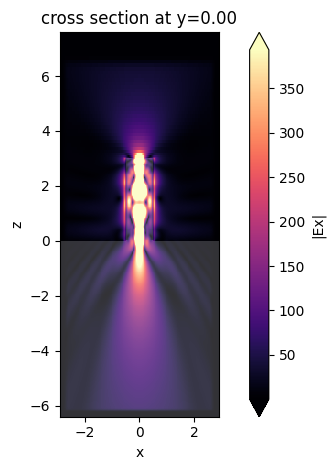

In [11]:
plot_field_data(sim_data)
# sim_data.plot_field("field", "Ex", val="abs", y=0)

In [15]:
plot_flux_data(freqs,sim_data)
# top_monitor = sim_data['top_monitor'].flux # flux taken in by the top monitor  
# bottom_monitor = sim_data['bottom_monitor'].flux # flux taken in by the bottom monitor  
# print(top_monitor)
# print(bottom_monitor)

<xarray.FluxDataArray (f: 1)>
array([-29.880636], dtype=float32)
Coordinates:
  * f        (f) float64 2.261e+14
Attributes:
    units:      W
    long_name:  flux
<xarray.FluxDataArray (f: 1)>
array([-418.4718], dtype=float32)
Coordinates:
  * f        (f) float64 2.261e+14
Attributes:
    units:      W
    long_name:  flux
